# HW2_TASK2

# 1. Introduction

Task2 requirements

Imagine that we only want to train a network that distinguishes between greeting, goodby, and request
(or order, or content). Consider simplifying the tags and try to generate a sub-corpus. Use the Python code
and tools to process the data. Generate a training corpus from the corpus resources listed above, if you
want, create your own resources from other corpus or entirely on your own.

Generate the corpus and data set to train and evaluate a network that recognizes the different types of
Dialogue Acts.

Describe your approach, results, and ideas for improvement.


# 2. Implementation

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import RMSprop
from keras import regularizers
from keras.callbacks import EarlyStopping

import os

### prepare for the data

I download the swda data at • http://compprag.christopherpotts.net/swda.html 
swda.zip
Build the filename direction list with os.listdir

In [2]:
#check the current path first
files_names_list = os.listdir('/Users/jianwenliu/nlp/HW2/swda')


In [3]:
#check the list
files_names_list

['.DS_Store',
 'sw00utt',
 'sw01utt',
 'sw02utt',
 'sw03utt',
 'sw04utt',
 'sw05utt',
 'sw06utt',
 'sw07utt',
 'sw08utt',
 'sw09utt',
 'sw10utt',
 'sw11utt',
 'sw12utt',
 'sw13utt',
 'swda-metadata.csv']

read all the files in all file folders for the details of transcript

In [4]:
#import glob for reading multiple folders
import glob

In [5]:
for i in files_names_list[1:-1]:

    swda_data = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', 'swda/'+i+"/*.csv"))))

In [6]:
swda_data.head(10)

,swda_filename,ptb_basename,conversation_no,transcript_index,act_tag,caller,utterance_index,subutterance_index,text,pos,trees,ptb_treenumbers
0,sw13utt/sw_1300_2335.utt,NaN,2335,0,qo,B,1,1,So what do you think? /,NaN,NaN,NaN
1,sw13utt/sw_1300_2335.utt,NaN,2335,1,br,A,2,1,"Uh, the causes of crime? /",NaN,NaN,NaN
2,sw13utt/sw_1300_2335.utt,NaN,2335,2,sv,A,2,2,"<Throat_clearing>. Um, I think it was imbalan...",NaN,NaN,NaN
3,sw13utt/sw_1300_2335.utt,NaN,2335,3,sv,A,2,3,It's causing the lower class to rebel. /,NaN,NaN,NaN
4,sw13utt/sw_1300_2335.utt,NaN,2335,4,sv,A,2,4,"That's why there's su-, such high crime, /",NaN,NaN,NaN
5,sw13utt/sw_1300_2335.utt,NaN,2335,5,sv,A,2,5,"and, uh, there's crime in, uh, young people be...",NaN,NaN,NaN
6,sw13utt/sw_1300_2335.utt,NaN,2335,6,b,B,3,1,Yeah. /,NaN,NaN,NaN
7,sw13utt/sw_1300_2335.utt,NaN,2335,7,sv,A,4,1,-- see too much crime on T V /,NaN,NaN,NaN
8,sw13utt/sw_1300_2335.utt,NaN,2335,8,sv,A,4,2,and they think it's the way to go. /,NaN,NaN,NaN
9,sw13utt/sw_1300_2335.utt,NaN,2335,9,h,A,4,3,I don't know. /,NaN,NaN,NaN


check the act tag for all the files

In [7]:
swda_data.act_tag

0         qo
1         br
2         sv
3         sv
4         sv
5         sv
6          b
7         sv
8         sv
9          h
10        qo
11      qw^h
12        aa
13         b
14        sv
15        sv
16         b
17        sv
18         b
19        sv
20         b
21        sd
22        sd
23         b
24        sd
25        sd
26        sd
27    sd(^q)
28    sd(^q)
29         b
       ...  
68        sd
69        sd
70        sv
71         b
72        sv
73         %
74        sd
75        sd
76         b
77        sv
78         %
79        sd
80        sv
81        aa
82        sd
83        sd
84        sv
85        sv
86        sd
87        sv
88         b
89        sd
90        sd
91         %
92        sd
93        sd
94        sv
95        sd
96        sv
97        sv
Name: act_tag, Length: 5319, dtype: object

check how many unique tags do we have

In [8]:
swda_data.act_tag.unique()

array(['qo', 'br', 'sv', 'b', 'h', 'qw^h', 'aa', 'sd', 'sd(^q)', '^2',
       '+', '%', 'x', 'b^r', 'qy^d', 'nn', 'sd^e', '^q', 'ny', 'ad',
       'ad^r', 'qy^g', 'nd', 'qh', 'qw', 'no', 'bk', 'ba', 'bf', 'fc',
       'ft', 'o', 'qy', 'b^m', 't3', 'ng', 'aa^r', 'qh^r', 'ny^r', 'sv^r',
       'qrr', 'sv^m', 'ar', 'o@', '+@', 'bd', 'fp', 'qr', 'sd^r', 'ba^r',
       'qw^r', 'na', 'bh', 'fe', 'sd^m', 'sv(^q)', 'nn^r', 'sv*', 'fa',
       'ba@', 'br^m', '^h', 'aa^m', 'sd@', 'bk^m', 'nn^e', 'qw^t', 'x*',
       'bf(^q)', 'cc', 'qy^2', 'b@', 'qr^d'], dtype=object)

In [9]:
len(swda_data.act_tag.unique())

73

### mapping tags into three classes

we dowmload the tag mapping table, trying to tranfer the class to a much narrower class

 check the http://compprag.christopherpotts.net/swda.html#tags for the mapping of act_tag <br>
 here, I download the file as damsl_act_tag.csv in the local dir, however, it does not affect the mapping when we figure it out the label for greeting, goodbye and request.

The important thing here is we found out that 'fc' for goodbye and 'fp' for greetings. There are also 4 tags begingning with 'q' marks for the request class. Noting that "qh" is actually not request for it is a Rhetorical-Questions.

In [10]:
tag_mapping = pd.read_csv('/Users/jianwenliu/nlp/HW2/damsl_act_tag.csv')

In [11]:
tag_mapping

,name,act_tag,example,train_count,full_count
0,1,Statement-non-opinion,sd,"Me, I'm in the legal department.",72824
1,2,Acknowledge (Backchannel),b,Uh-huh.,37096
2,3,Statement-opinion,sv,I think it's great,25197
3,4,Agree/Accept,aa,That's exactly it.,10820
4,5,Abandoned or Turn-Exit,%,"So, -",10569
5,6,Appreciation,ba,I can imagine.,4633
6,7,Yes-No-Question,qy,Do you have to have any special training?,4624
7,8,Non-verbal,x,"[Laughter], [Throat_clearing]",3548
8,9,Yes answers,ny,Yes.,2934
9,10,Conventional-closing,fc,"Well, it's been nice talking to you.",2486


In [12]:
tag_mapping['example']

0                sd
1                 b
2                sv
3                aa
4                 %
5                ba
6                qy
7                 x
8                ny
9                fc
10                %
11               qw
12               nn
13               bk
14                h
15             qy^d
16    fo_o_fw_by_bc
17               bh
18               ^q
19               bf
20               na
21               ad
22               ^2
23              b^m
24               qo
25               qh
26               ^h
27               ar
28               ng
29               br
30               no
31               fp
32              qrr
33           arp_nd
34               t3
35         oo_co_cc
36               t1
37               bd
38           aap_am
39               ^g
40             qw^d
41               fa
42               ft
Name: example, dtype: object

In [13]:
swda_data['act_tag'][:30]

0         qo
1         br
2         sv
3         sv
4         sv
5         sv
6          b
7         sv
8         sv
9          h
10        qo
11      qw^h
12        aa
13         b
14        sv
15        sv
16         b
17        sv
18         b
19        sv
20         b
21        sd
22        sd
23         b
24        sd
25        sd
26        sd
27    sd(^q)
28    sd(^q)
29         b
Name: act_tag, dtype: object

In [14]:
swda_data.head(5)

,swda_filename,ptb_basename,conversation_no,transcript_index,act_tag,caller,utterance_index,subutterance_index,text,pos,trees,ptb_treenumbers
0,sw13utt/sw_1300_2335.utt,NaN,2335,0,qo,B,1,1,So what do you think? /,NaN,NaN,NaN
1,sw13utt/sw_1300_2335.utt,NaN,2335,1,br,A,2,1,"Uh, the causes of crime? /",NaN,NaN,NaN
2,sw13utt/sw_1300_2335.utt,NaN,2335,2,sv,A,2,2,"<Throat_clearing>. Um, I think it was imbalan...",NaN,NaN,NaN
3,sw13utt/sw_1300_2335.utt,NaN,2335,3,sv,A,2,3,It's causing the lower class to rebel. /,NaN,NaN,NaN
4,sw13utt/sw_1300_2335.utt,NaN,2335,4,sv,A,2,4,"That's why there's su-, such high crime, /",NaN,NaN,NaN


Now, we are trying to do the tags shrinking mapping for simplyfing classes. The logic is simple, we only check the character of the tags and decide which class it is. Then we can built a function as a recognizer, to get all the text which matches the class and discard the rest for simplicity.
we only need greeting, goodby, and request. Another reason that we discard the rest here is we do not want it to be imbalanced data which will affect the metrics score.

In [15]:
#mapping function
#0 for greeting, 1 for goodbye, 2 for request 
def tag_number_map(tag_char):
    if tag_char[:2] == 'fc': #goodbye
        return 1    
    elif tag_char[:2] == 'fp':#greeting
        return 0 
    elif tag_char[:2] == 'qy' or tag_char[:2] == 'qw'or tag_char[:2] == 'qo'or tag_char[:3] == 'qrr' or tag_char[:2] ==  '^g':
        return 2
    else:
        return 9999

Apply the tag_number_map function in lambda to get the responding number for classes, preparing for the features we want.

In [16]:
def add_no(swda_data):
    swda_data_sim_class=[]
    for i in swda_data['act_tag']:
        swda_data_sim_class.append(tag_number_map(i))
    return swda_data_sim_class

In [17]:
# get the class
swda_data_sim_class=add_no(swda_data)

In [18]:
#show the class here
swda_data_sim_class

[2,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 2,
 2,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 2,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 2,
 2,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 2,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,
 9999,

In [19]:
#merger list to dataframe
swda_data['tag_number'] = swda_data_sim_class

In [20]:
swda_data.head(10)

,swda_filename,ptb_basename,conversation_no,transcript_index,act_tag,caller,utterance_index,subutterance_index,text,pos,trees,ptb_treenumbers,tag_number
0,sw13utt/sw_1300_2335.utt,NaN,2335,0,qo,B,1,1,So what do you think? /,NaN,NaN,NaN,2
1,sw13utt/sw_1300_2335.utt,NaN,2335,1,br,A,2,1,"Uh, the causes of crime? /",NaN,NaN,NaN,9999
2,sw13utt/sw_1300_2335.utt,NaN,2335,2,sv,A,2,2,"<Throat_clearing>. Um, I think it was imbalan...",NaN,NaN,NaN,9999
3,sw13utt/sw_1300_2335.utt,NaN,2335,3,sv,A,2,3,It's causing the lower class to rebel. /,NaN,NaN,NaN,9999
4,sw13utt/sw_1300_2335.utt,NaN,2335,4,sv,A,2,4,"That's why there's su-, such high crime, /",NaN,NaN,NaN,9999
5,sw13utt/sw_1300_2335.utt,NaN,2335,5,sv,A,2,5,"and, uh, there's crime in, uh, young people be...",NaN,NaN,NaN,9999
6,sw13utt/sw_1300_2335.utt,NaN,2335,6,b,B,3,1,Yeah. /,NaN,NaN,NaN,9999
7,sw13utt/sw_1300_2335.utt,NaN,2335,7,sv,A,4,1,-- see too much crime on T V /,NaN,NaN,NaN,9999
8,sw13utt/sw_1300_2335.utt,NaN,2335,8,sv,A,4,2,and they think it's the way to go. /,NaN,NaN,NaN,9999
9,sw13utt/sw_1300_2335.utt,NaN,2335,9,h,A,4,3,I don't know. /,NaN,NaN,NaN,9999


we use a shallow copy to filter and delete all the irrelevate data in raw data. The reason for doing that is most of corpus does not belong to these three classes. Adding those irrelevant data into class will cause a severe Accuracy problem when we try to measure the performance. Thus, we only keep three classes in corpuses.

In [21]:
#filter and get only validated documents
swda_data_new=swda_data[swda_data['tag_number'].isin([0, 1,2])]

In [22]:
#check the class shape
swda_data_new.shape

(232, 13)

In [23]:
#check the classs
# it actually matches 3, which is what we want
len(swda_data_new.tag_number.unique())

3

In [24]:
#check the text in the data
swda_data_new.text

0                                So what do you think? /
10                                  What do you think? /
11                                       What about, - /
77                                       I don't know --
94                            What about with adults?  /
95            Anything do any about (( )) adult crime. /
130    if you write a bad check, you go to jail, righ...
189                       Who's going to pay for mine? /
206                                      Where you at? /
210                          Well, where are you from? /
225                         Why was, you know, why -- -/
227               -- you know, why didn't they just, - /
304                                        All right.  /
305                         Well listen, I got to go.  /
306                                        All righty. /
307                               Nice talking to you. /
309                                         All right. /
310                            

In [25]:
swda_data_new.text.values

array(['So what do you think? /', 'What do you think? /',
       'What about, - /', "I don't know --", 'What about with adults?  /',
       'Anything do any about (( )) adult crime. /',
       'if you write a bad check, you go to jail, right. /',
       "Who's going to pay for mine? /", 'Where you at? /',
       'Well, where are you from? /', 'Why was, you know, why -- -/',
       "-- you know, why didn't they just, - /", 'All right.  /',
       'Well listen, I got to go.  /', 'All righty. /',
       'Nice talking to you. /', 'All right. /', 'Bye-bye. /',
       'Bye-bye. /',
       'so, um, have you, have you worked outside, also and, um, feel that, it, that, - /',
       'well, how do you feel, as far as, uh, - /',
       'what would be a happy medium  /',
       'or, or what would you like to see?  </children>. /',
       '[Children] Well, what do you think, <noise> {water running}  /',
       'Do they have children? /', 'Is she spayed. /',
       "You're off of the main road, you s

## text feature extraction

In [26]:
# use CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer=CountVectorizer()
X = CountVectorizer.fit_transform(swda_data_new.text.values)

In [27]:
# prepare for the label and chage it to arrays
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(swda_data_new.tag_number.values.astype('str'))

In [91]:
#split the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, shuffle=True)

In [92]:
#check the x train shape
X_train.shape

(213, 411)

we use the X_train.shape[1] as the input demension

In [93]:
input_dim = X_train.shape[1]
input_dim

411

### set up the NN model (dense+dense+drop+output)

In [104]:
#hype paras
epochs = 80
final_class = y.shape[1]
batch_size = 64

#typical NN model: one dense layer+one dense layer+one dropout (overfit) layer+output (with) layer
def NN_model(input_dim, final_class):
    
    input = Input(shape=(input_dim,), sparse=True)
    dense1 = Dense(256, activation='relu')(input)
    dense2 = Dense(64, activation='relu')(dense1)
    drop1  = Dropout(0.8)(dense2)
    out   = Dense(final_class,kernel_regularizer=regularizers.l2(0.02),activation='softmax')(drop1)
    
    model = Model(input, out)
    
    model.summary()
    
    #use rmsprop for optimizer
    rms=RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.99)
    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

    return model

deploy the model

In [105]:
model = NN_model(input_dim, final_class)

history = model.fit(X_train, y_train,batch_size,epochs,validation_split=0.2,callbacks=[EarlyStopping(patience=2, monitor='val_loss')])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 411)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               105472    
_________________________________________________________________
dense_41 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 3)                 195       
Total params: 122,115
Trainable params: 122,115
Non-trainable params: 0
_________________________________________________________________
Train on 170 samples, validate on 43 samples
Epoch 1/80
170/170 [==============================] - 0s - loss: 1.1685 - acc: 0.4706 - val

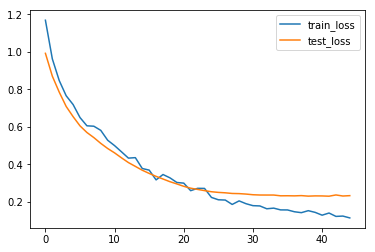

In [106]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')   
plt.legend()
plt.show()

In [107]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
acc = accuracy_score(np.argmax(np.array(y_test), axis=-1).flatten(), np.argmax(y_pred, axis=-1).flatten())
acc

0.8947368421052632

In [108]:
from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=-1).flatten(), np.argmax(y_pred, axis=-1).flatten(), average='weighted')
f1

0.8879699248120302

# 3. Conclusion

We found out that the building a NN model with one layer drop-out and regularization can welll capture the relation between classes and text feature. I use a four layers NN model for classification. The F1 SCORE reaches 0.88, which is a a improvement. The most crucial part is that I use a filter before to get the only three classes of corpus I want, otherwise it will affect the accuracy.
Discussion about this project is that It turns out the overfitting problem is the bigggest problem in this project. We may use more drop out or regularization for the traning in the future.